## Data Preprocessing

In [2]:
import os
import math
import glob
import random
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
trimmed_csv_files = glob.glob("C:/Users/sasid/Documents/QRA/Finance/StkPrcPred/Data/ETFs_final/trimmed/*.csv")

In [4]:
concat_df = pd.DataFrame()

In [5]:
#https://saturncloud.io/blog/how-to-read-multiple-csv-files-into-python-pandas-dataframe/#:~:text=We%20use%20the%20glob%20function,the%20read_csv%20function%20from%20Pandas.

In [6]:
for csv_file in tqdm(trimmed_csv_files):
    df = pd.read_csv(csv_file)
    filename =os.path.splitext( os.path.basename(csv_file))[0]
    filename = filename.split('_')[0]
    df['File'] = filename
    concat_df = pd.concat([concat_df,df])

100%|██████████| 1344/1344 [01:36<00:00, 13.91it/s]


In [7]:
print(len(concat_df))
concat_df.head()

2531473


Date    Open    High     Low   Close Volume OpenInt  File
0  2010-07-21  24.333  24.333  23.946  23.946  43321       0  aadr
1  2010-07-22  24.644  24.644  24.362  24.487  18031       0  aadr
2  2010-07-23  24.759  24.759  24.314  24.507   8897       0  aadr
3  2010-07-26  24.624  24.624  24.449  24.595  19443       0  aadr
4  2010-07-27  24.477  24.517  24.431  24.517   8456       0  aadr

In [8]:
#finding null values
concat_df.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
File       0
dtype: int64

In [9]:
#finding unique elements in dataframe
u=df['OpenInt'].unique()
print(u)

[0]


In [10]:
concat_df = concat_df.drop('OpenInt',axis=1)
concat_df.head(6)

Date    Open    High     Low   Close Volume  File
0  2010-07-21  24.333  24.333  23.946  23.946  43321  aadr
1  2010-07-22  24.644  24.644  24.362  24.487  18031  aadr
2  2010-07-23  24.759  24.759  24.314  24.507   8897  aadr
3  2010-07-26  24.624  24.624  24.449  24.595  19443  aadr
4  2010-07-27  24.477  24.517  24.431  24.517   8456  aadr
5  2010-07-28  24.477  24.517  24.352  24.431   4967  aadr

In [11]:
concat_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
File       object
dtype: object

In [12]:
concat_df['Date']=pd.to_datetime(df['Date'])
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2531473 entries, 0 to 2223
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Open    float64       
 2   High    float64       
 3   Low     float64       
 4   Close   float64       
 5   Volume  object        
 6   File    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 154.5+ MB


In [13]:
concat_df = concat_df.sort_values(by='Date')

In [14]:
concat_df

Date       Open       High        Low      Close Volume  File
0    2008-12-03     24.333     24.333     23.946     23.946  43321  aadr
0    2008-12-03     42.044     42.049     42.044     42.049    553   nyf
0    2008-12-03  16108.000  16288.000  15804.000  15848.000    248  nugt
0    2008-12-03     12.192     12.192     12.066     12.066  39569  norw
0    2008-12-03     38.058     38.058     38.058     38.058  62002  nobl
...         ...        ...        ...        ...        ...    ...   ...
2224        NaT     74.340     74.500     74.000     74.120  16346   ycs
2225        NaT     74.060     74.450     74.050     74.210  11816   ycs
2226        NaT     74.380     74.730     74.300     74.520  33357   ycs
2227        NaT     74.850     74.850     74.540     74.740   8420   ycs
2228        NaT     74.430     74.740     74.400     74.510  10559   ycs

[2531473 rows x 7 columns]

In [15]:
len(concat_df['Date'].unique())

2225

In [16]:
concat_df[concat_df['Date'].isna()]

Date   Open   High     Low  Close   Volume  File
2224  NaT  67.40  67.56  67.280  67.39  2022957  aaxj
2225  NaT  67.67  67.89  67.600  67.67  3447843  aaxj
2226  NaT  67.70  67.93  67.630  67.82   240162  aaxj
2227  NaT  68.48  68.61  68.225  68.41   255154  aaxj
2228  NaT  68.09  68.19  67.730  67.73   654842  aaxj
...   ...    ...    ...     ...    ...      ...   ...
2224  NaT  74.34  74.50  74.000  74.12    16346   ycs
2225  NaT  74.06  74.45  74.050  74.21    11816   ycs
2226  NaT  74.38  74.73  74.300  74.52    33357   ycs
2227  NaT  74.85  74.85  74.540  74.74     8420   ycs
2228  NaT  74.43  74.74  74.400  74.51    10559   ycs

[310622 rows x 7 columns]

In [17]:
concat_df.dropna(subset=['Date'], inplace=True)

In [18]:
concat_df[concat_df['Date'].isna()]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume, File]
Index: []

In [19]:
len(concat_df)

2220851

In [20]:
print(f'Zeros in Open {concat_df.Open[concat_df.Open==0].count()}')
print(f'Zeros in Close {concat_df.Close[concat_df.Close==0].count()}')
print(f'Zeros in High {concat_df.High[concat_df.High==0].count()}')
print(f'Zeros in Low {concat_df.Low[concat_df.Low==0].count()}')

Zeros in Open 19
Zeros in Close 0
Zeros in High 0
Zeros in Low 26


In [21]:
concat_df = concat_df[(concat_df != 0).all(1)]
#Droping rows with atleast 1 Zero 
#https://stackoverflow.com/questions/74808517/remove-rows-where-at-least-one-zero-value

In [22]:
print(f'Zeros in Open {concat_df.Open[concat_df.Open==0.0].count()}')
print(f'Zeros in Close {concat_df.Close[concat_df.Close==0.0].count()}')
print(f'Zeros in High {concat_df.High[concat_df.High==0.0].count()}')
print(f'Zeros in Low {concat_df.Low[concat_df.Low==0.0].count()}')

Zeros in Open 0
Zeros in Close 0
Zeros in High 0
Zeros in Low 0


In [23]:
len(concat_df)

2217837

In [24]:
concat_df['Date'].iloc[-11:]

2223   2017-10-04
2223   2017-10-04
2223   2017-10-04
2223   2017-10-04
2223   2017-10-04
2223   2017-10-04
2223   2017-10-04
2223   2017-10-04
2223   2017-10-04
2223   2017-10-04
2223   2017-10-04
Name: Date, dtype: datetime64[ns]

In [25]:
concat_df

Date       Open       High        Low      Close  Volume  File
0    2008-12-03     24.333     24.333     23.946     23.946   43321  aadr
0    2008-12-03     42.044     42.049     42.044     42.049     553   nyf
0    2008-12-03  16108.000  16288.000  15804.000  15848.000     248  nugt
0    2008-12-03     12.192     12.192     12.066     12.066   39569  norw
0    2008-12-03     38.058     38.058     38.058     38.058   62002  nobl
...         ...        ...        ...        ...        ...     ...   ...
2223 2017-10-04     87.505     87.647     87.221     87.505  138178   voe
2223 2017-10-04     40.761     41.086     40.761     41.001   27038   iai
2223 2017-10-04     47.190     47.477     47.066     47.393   40911   iak
2223 2017-10-04    106.030    106.320    106.030    106.200  107738   gvi
2223 2017-10-04     32.800     33.130     32.690     32.900   20608   zsl

[2217837 rows x 7 columns]

In [26]:
#performing substraction on columns is notworking on concat_df
concaterd = concat_df.copy()
concaterd

Date       Open       High        Low      Close  Volume  File
0    2008-12-03     24.333     24.333     23.946     23.946   43321  aadr
0    2008-12-03     42.044     42.049     42.044     42.049     553   nyf
0    2008-12-03  16108.000  16288.000  15804.000  15848.000     248  nugt
0    2008-12-03     12.192     12.192     12.066     12.066   39569  norw
0    2008-12-03     38.058     38.058     38.058     38.058   62002  nobl
...         ...        ...        ...        ...        ...     ...   ...
2223 2017-10-04     87.505     87.647     87.221     87.505  138178   voe
2223 2017-10-04     40.761     41.086     40.761     41.001   27038   iai
2223 2017-10-04     47.190     47.477     47.066     47.393   40911   iak
2223 2017-10-04    106.030    106.320    106.030    106.200  107738   gvi
2223 2017-10-04     32.800     33.130     32.690     32.900   20608   zsl

[2217837 rows x 7 columns]

In [27]:
concaterd['Changes'] = concaterd['Close']-concaterd['Open']

In [28]:
concaterd

Date       Open       High        Low      Close  Volume  File  \
0    2008-12-03     24.333     24.333     23.946     23.946   43321  aadr   
0    2008-12-03     42.044     42.049     42.044     42.049     553   nyf   
0    2008-12-03  16108.000  16288.000  15804.000  15848.000     248  nugt   
0    2008-12-03     12.192     12.192     12.066     12.066   39569  norw   
0    2008-12-03     38.058     38.058     38.058     38.058   62002  nobl   
...         ...        ...        ...        ...        ...     ...   ...   
2223 2017-10-04     87.505     87.647     87.221     87.505  138178   voe   
2223 2017-10-04     40.761     41.086     40.761     41.001   27038   iai   
2223 2017-10-04     47.190     47.477     47.066     47.393   40911   iak   
2223 2017-10-04    106.030    106.320    106.030    106.200  107738   gvi   
2223 2017-10-04     32.800     33.130     32.690     32.900   20608   zsl   

      Changes  
0      -0.387  
0       0.005  
0    -260.000  
0      -0.126  
0       0.000  
...       ...  
2223    0.000  
2223    0.240  
2223    0.203  
2223    0.170  
2223    0.100  

[2217837 rows x 8 columns]

In [29]:
filedf=concaterd[concaterd['File']=='nugt']
print(filedf['Close'].max())
filedf.head(3)

17288.0


Date     Open     High      Low    Close Volume  File  Changes
0 2008-12-03  16108.0  16288.0  15804.0  15848.0    248  nugt   -260.0
1 2008-12-04  15976.0  16128.0  15724.0  15872.0    191  nugt   -104.0
2 2008-12-05  15604.0  15832.0  15252.0  15304.0    168  nugt   -300.0

# Time Series Analysis

## Trend Analysis

##### PLotting for files individually using filename to filter on same plot

In [30]:
def trend_analysis(df,file_names):
    num_files = len(file_names)
    markers = ['o','^','x','2','*','p']

    for i, file_name in enumerate(file_names):
        file_df = df[df['File'] == file_name]
        plt.plot(file_df['Date'],file_df['Close'],marker=markers[i%len(markers)],label=file_name)
    
    plt.title(f'Close Price over Date for selected Files')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend(title='File')
    plt.grid(True)
    plt.show()

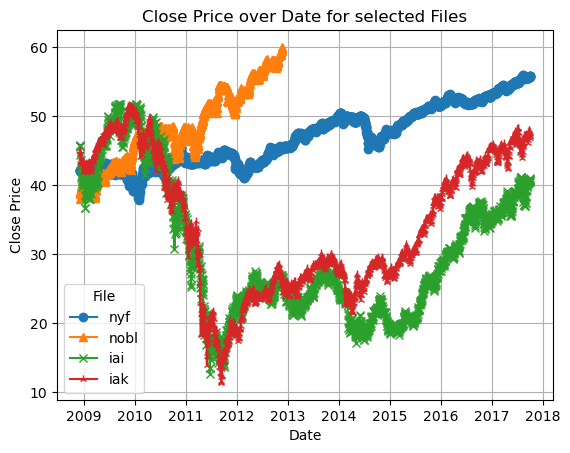

In [31]:
filenames = ['nyf','nobl','iai','iak']
trend_analysis(concaterd,filenames)

### Plotting for 50 random files to understand the trend of Price

In [32]:
def trend_analysis50(df,filenum=14,col=4):   
    files = df['File'].tolist()
    file_names = random.sample(files,filenum)
    num_files = len(file_names)
    row = math.ceil(num_files/col)
    fig,axes = plt.subplots(row,col,figsize=(30,7*row))
    axes=axes.flatten()
    markers = ['o','^','x','2','*','p']

    for i, file_name in enumerate(file_names):
        file_df = df[df['File'] == file_name]
        axes[i].plot(file_df['Date'],file_df['Close'],marker='2',label=file_name) 
        axes[i].set_title(f'Close Price over Date for selected {file_name.upper()}')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Close Price')
        axes[i].grid(True)
        axes[i].legend()

    plt.tight_layout()
    plt.show()

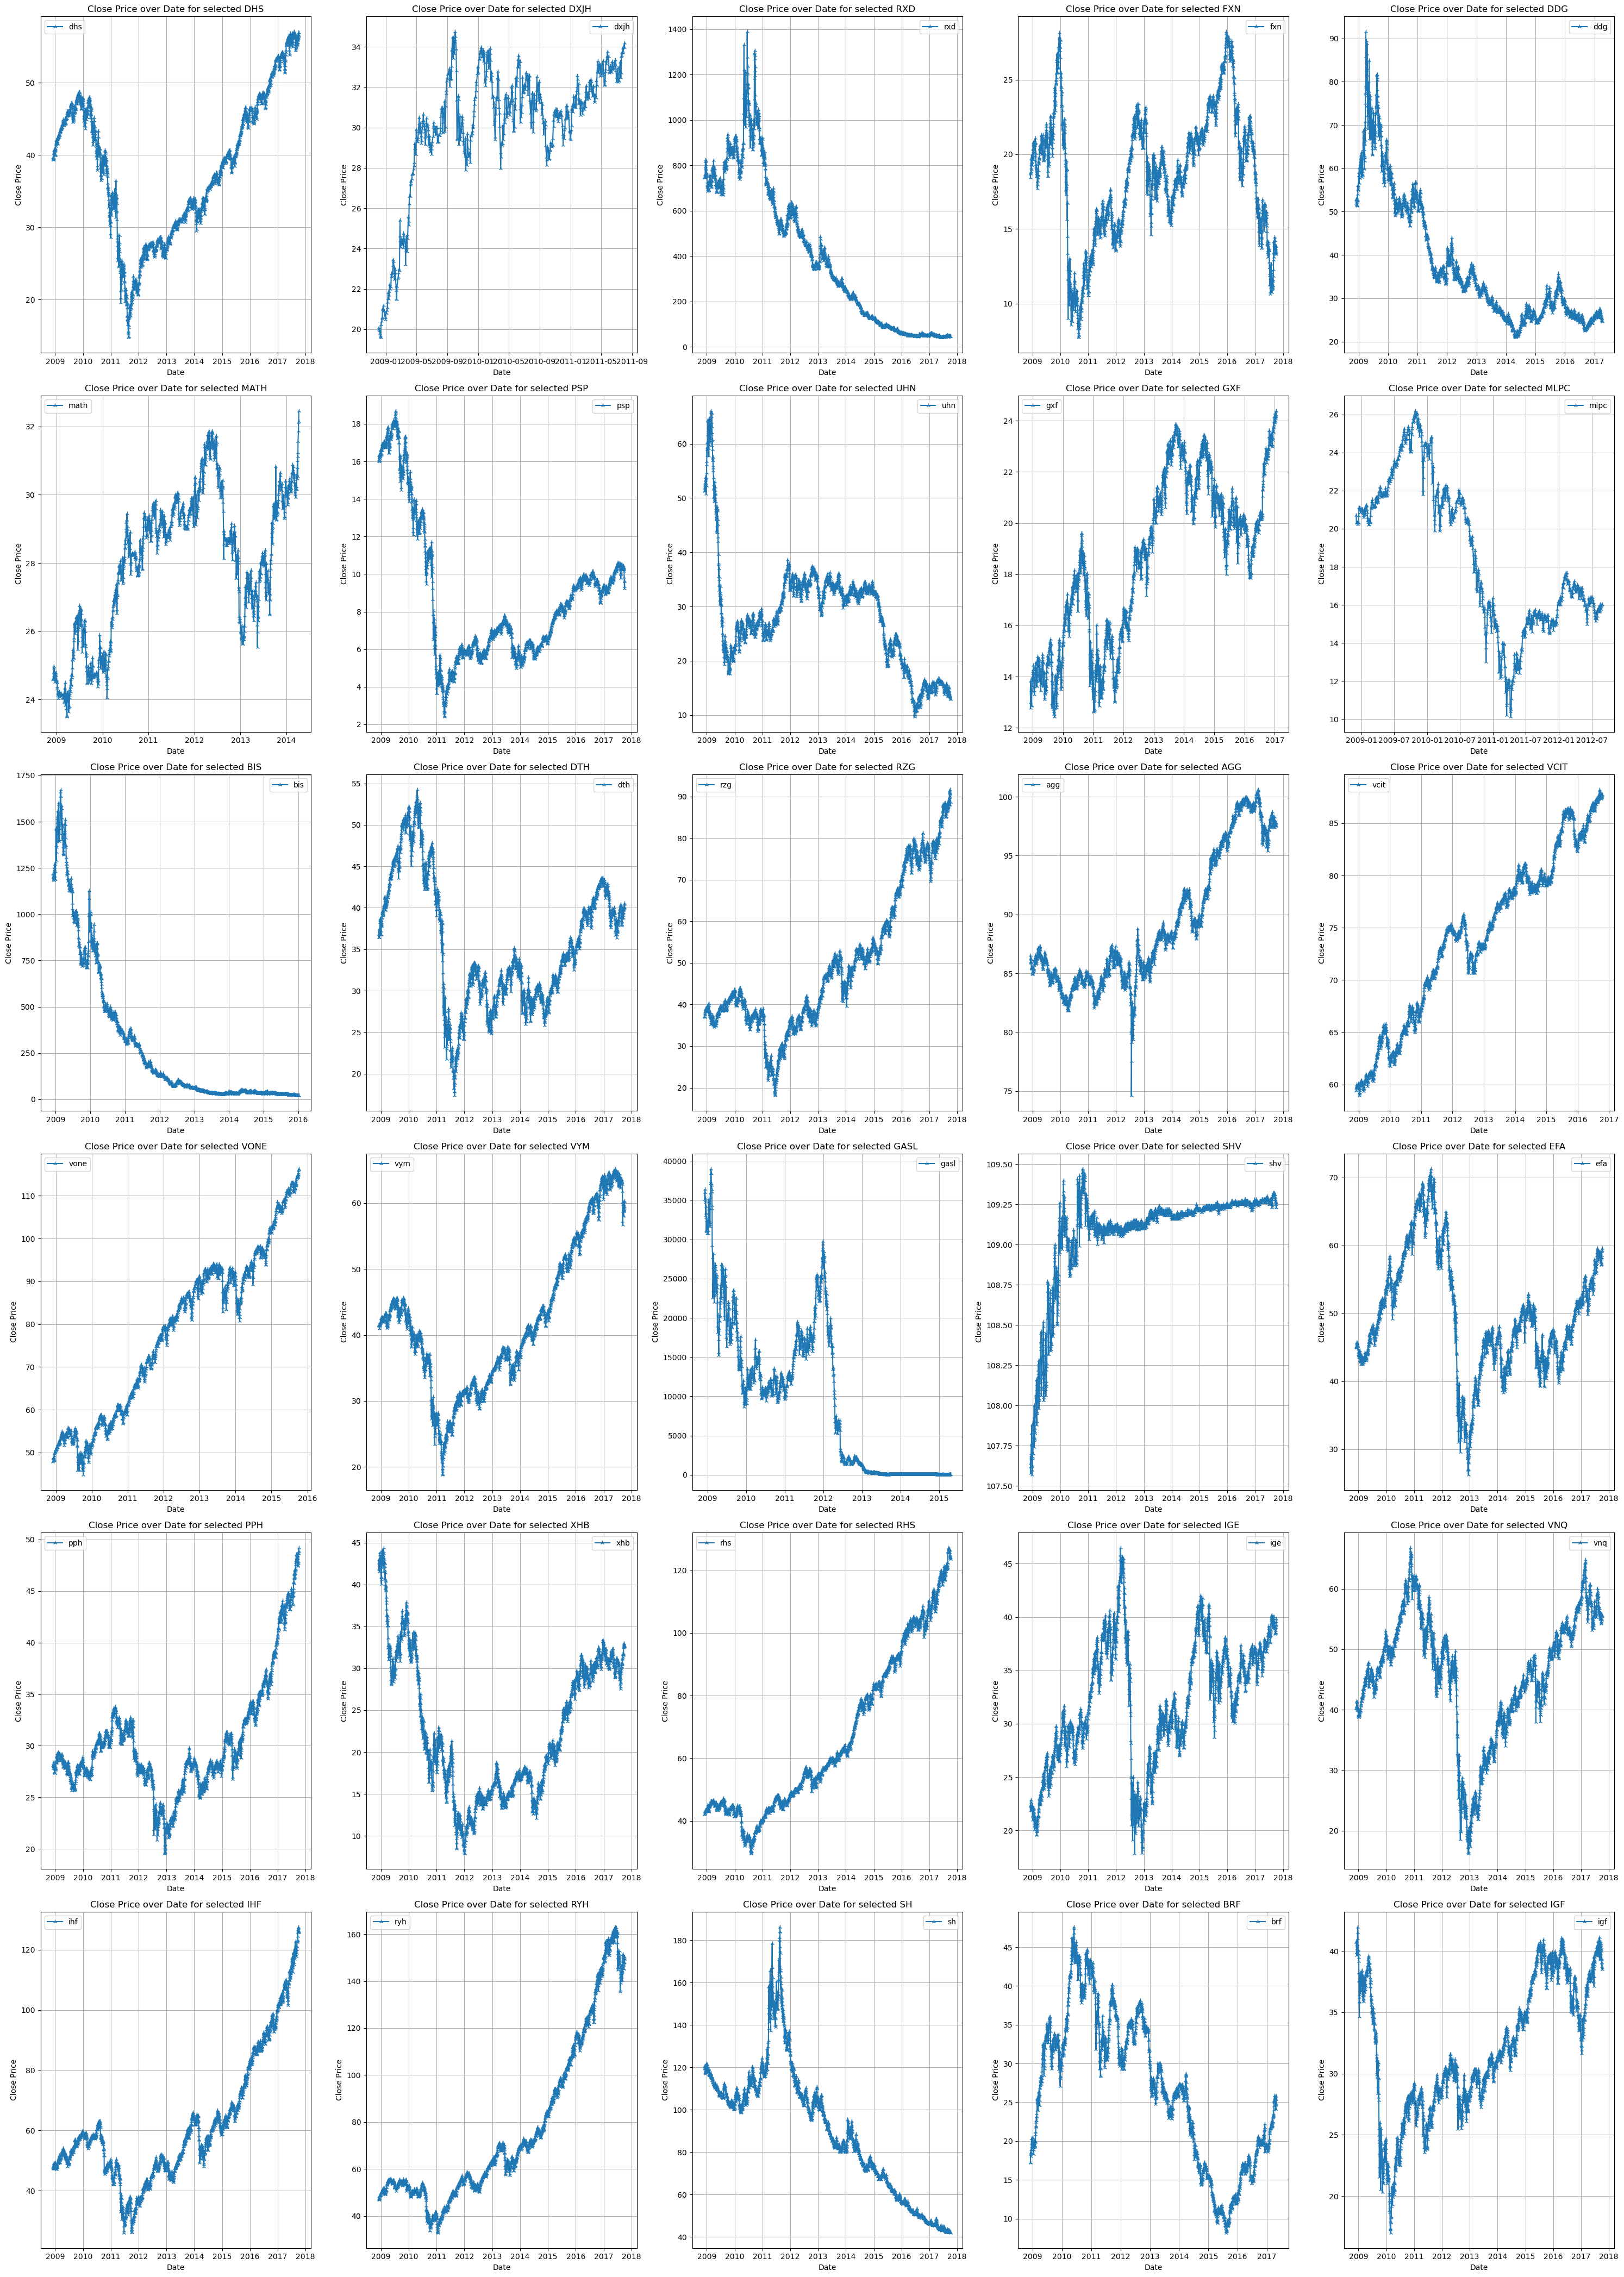

In [33]:
trend_analysis50(concaterd,30,5)

### Rolling Statistics

In [34]:
def rolling_statistics50(df,filenum=14,col=4,window_size=3):   
    files = df['File'].tolist()
    file_names = random.sample(files,filenum)
    num_files = len(file_names)
    row = math.ceil(num_files/col)
    fig,axes = plt.subplots(row,col,figsize=(30,7*row))
    axes=axes.flatten()
    markers = ['o','^','x','2','*','p']

    for i, file_name in enumerate(file_names):
        file_dfo = df[df['File'] == file_name]
        file_df=file_dfo.copy()
        file_df['Rolling_Mean'] = file_df['Close'].rolling(window=window_size).mean()
        file_df['Rolling_Std'] = file_df['Close'].rolling(window=window_size).std()
        axes[i].plot(file_df['Date'],file_df['Close'],marker='p',linestyle='--',label=file_name)
        axes[i].plot(file_df['Date'], file_df['Rolling_Mean'],marker='o',linestyle='--',label=f'{window_size}-Day rolling Mean')
        axes[i].plot(file_df['Date'], file_df['Rolling_Std'],marker='o',linestyle='--',label=f'{window_size}-Day rolling Std')
        
        axes[i].set_title(f'Close Price over Date for selected {file_name.upper()}')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Close Price')
        axes[i].grid(True)
        axes[i].legend()

    plt.tight_layout()
    plt.show()

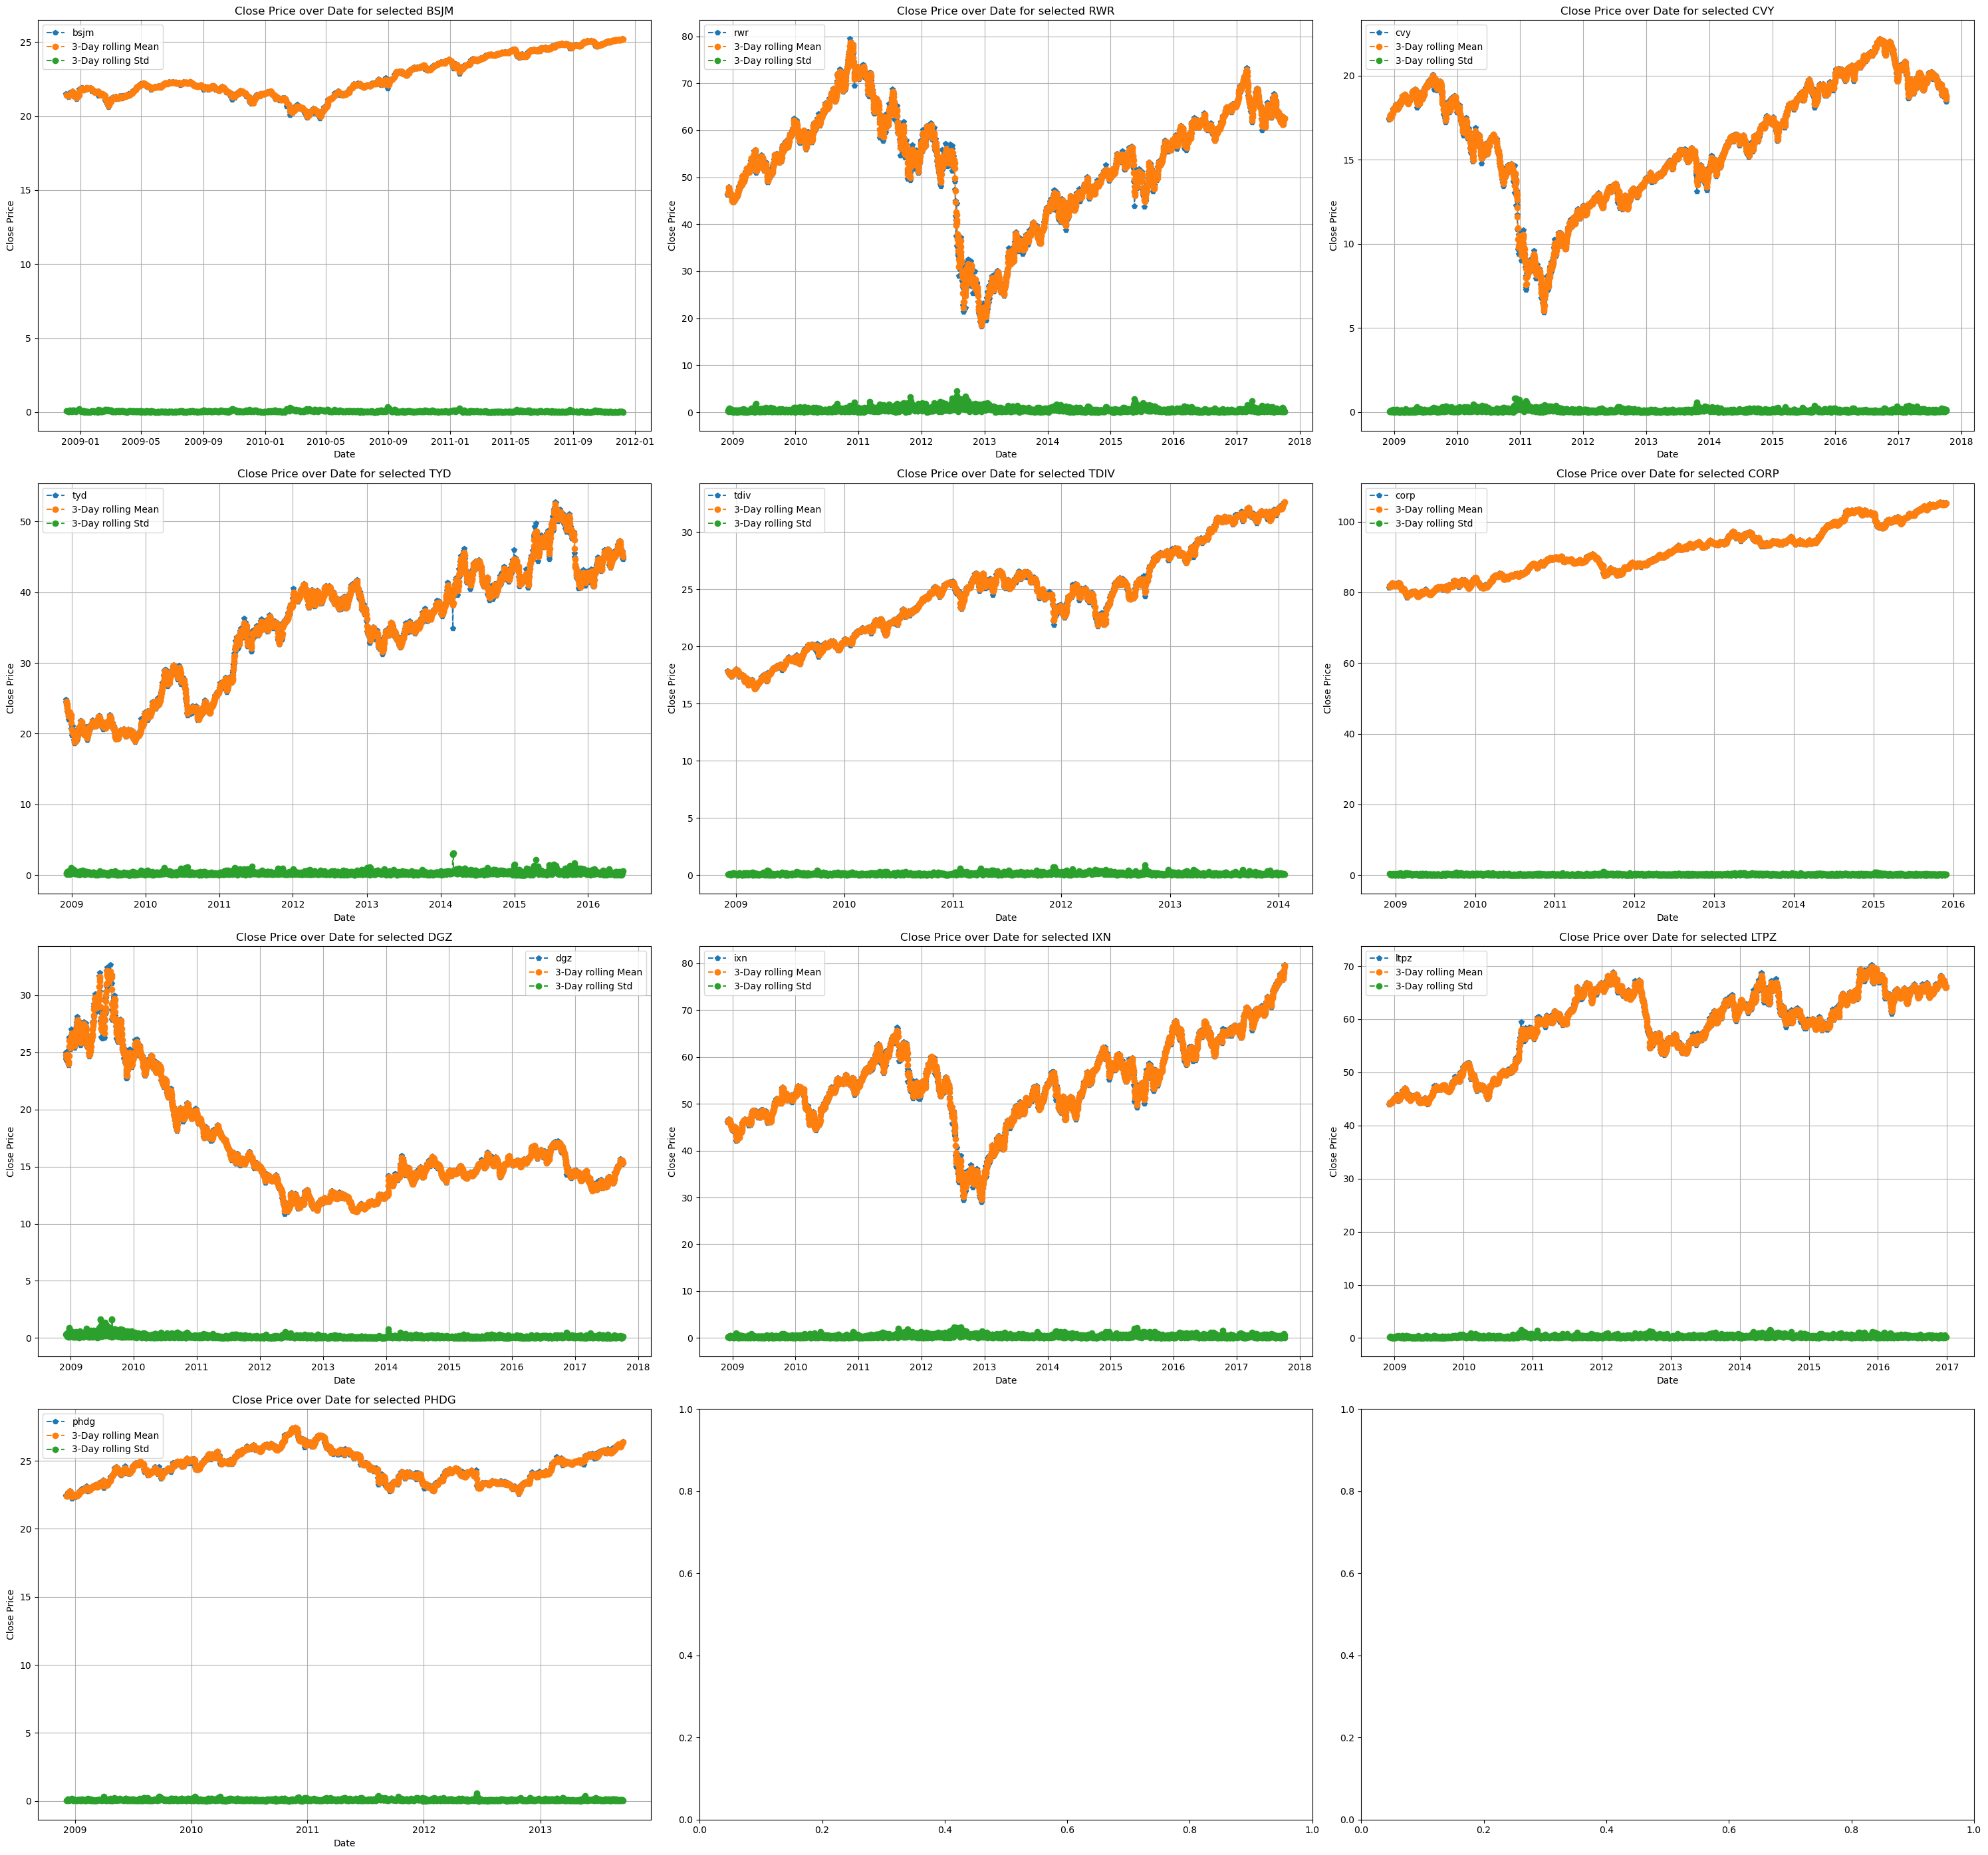

In [35]:
rolling_statistics50(concaterd,10,3,3)

### Volume Analysis 

In [36]:
def volume_analysis50(df,filenum=14,col=4):   
    files = df['File'].tolist()
    file_names = random.sample(files,filenum)
    num_files = len(file_names)
    row = math.ceil(num_files/col)
    fig,axes = plt.subplots(row,col,figsize=(30,7*row))
    axes=axes.flatten()
    markers = ['o','^','x','2','*','p']

    for i, file_name in enumerate(file_names):
        file_df = df[df['File'] == file_name]
        axes[i].plot(file_df['Date'],file_df['Volume'],marker='o',label=file_name) 
        axes[i].set_title(f'Volume over Date for selected {file_name.upper()}')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Volume')
        axes[i].grid(True)
        axes[i].legend()

    plt.tight_layout()
    plt.show()

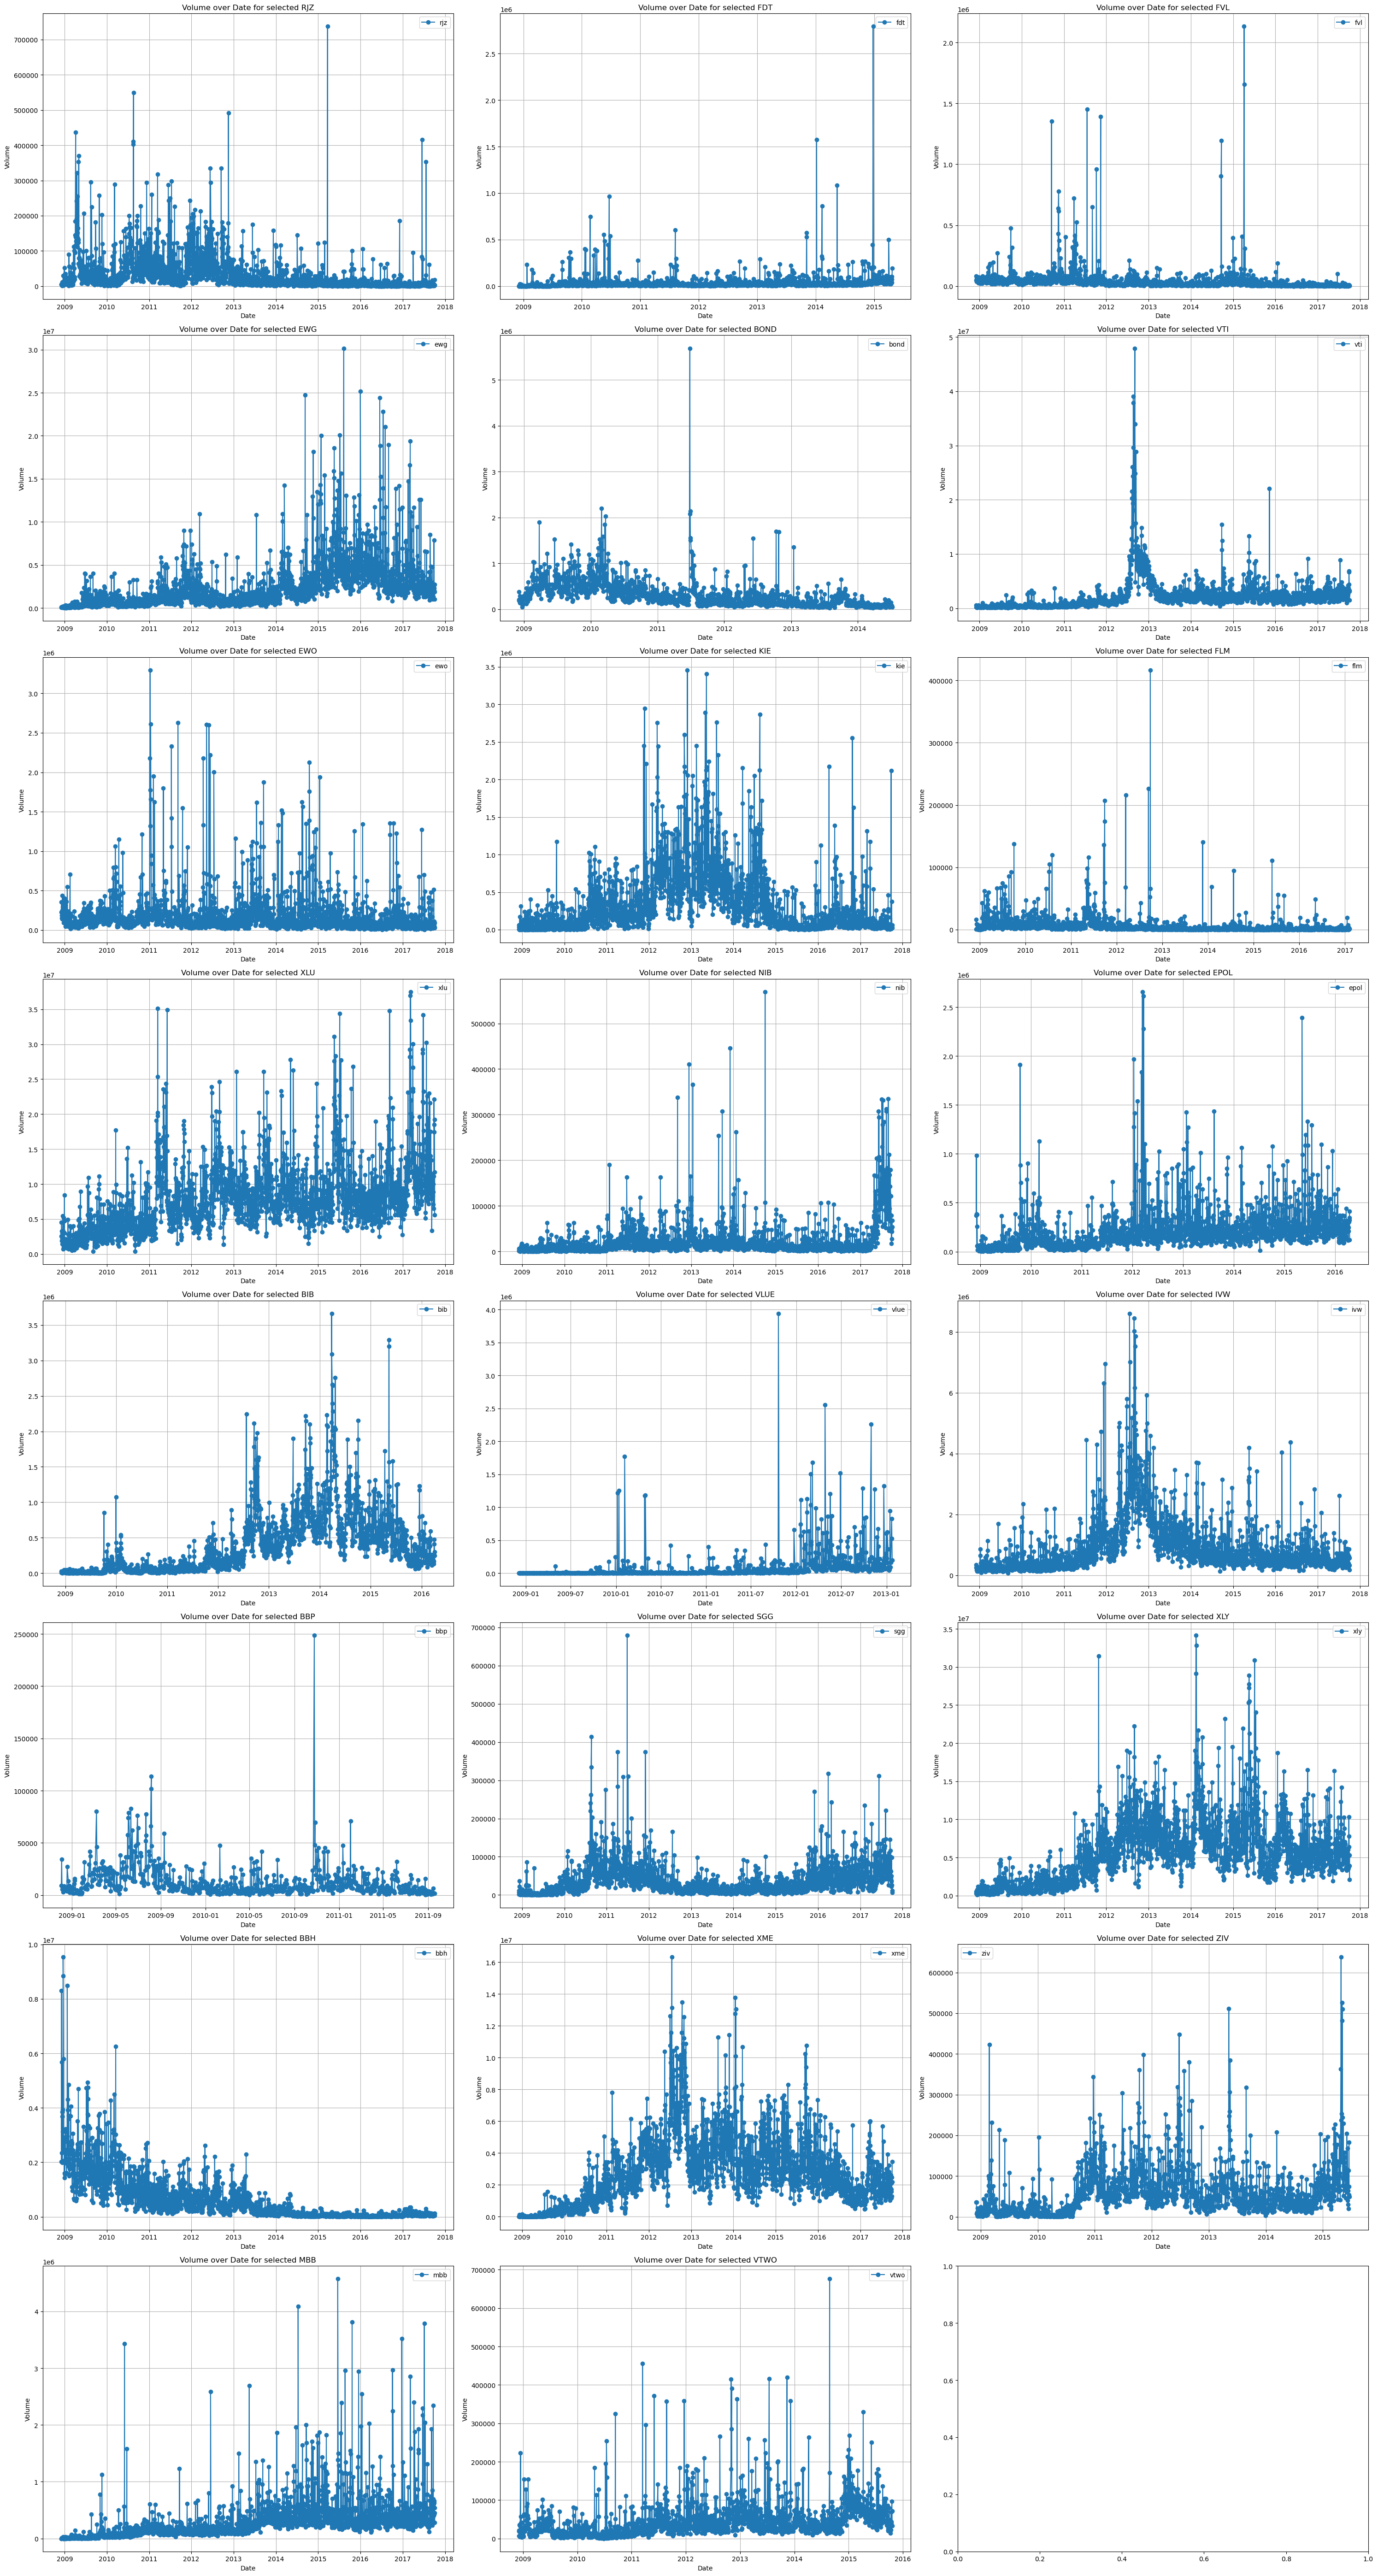

In [37]:
volume_analysis50(concaterd,23,3)

### Price vs Volume analysis

In [38]:
def price_volume_analysis(df,file_name,start_year,end_year):
    #file_names = df['File'].unique()

    '''# Loop through each file to analyze volume
    for file_name in file_names:
        # Filter the DataFrame for the specific file and year range'''
    file_df = df[(df['File'] == file_name) & (df['Date'].dt.year >= start_year) & (df['Date'].dt.year <= end_year)]

    if len(file_df) > 0:
        # Calculate Total and Average Daily Volume
        total_volume = file_df['Volume'].sum()
        average_daily_volume = file_df['Volume'].mean()

        # Identify Volume Spikes (e.g., 1.5 times the average)
        volume_spike_threshold = 1.5 * average_daily_volume
        file_df['Volume_Spike'] = file_df['Volume'] > volume_spike_threshold

        print(f"\nVolume Analysis for '{file_name.upper()}' from {start_year} to {end_year}:")
        print(f"  - Total Volume: {total_volume}")
        print(f"  - Average Daily Volume: {average_daily_volume:.2f}")
        print(f"  - Volume Spike Threshold: {volume_spike_threshold:.2f}")

        # Plot Volume over Time and Highlight Spikes
        plt.figure(figsize=(10, 6))
        plt.bar(file_df['Date'], file_df['Volume'], color='blue', alpha=0.6, label='Daily Volume')
        plt.bar(file_df[file_df['Volume_Spike']]['Date'], 
                file_df[file_df['Volume_Spike']]['Volume'], 
                color='red', alpha=0.6, label='Volume Spike')
        plt.title(f'Daily Trading Volume for {file_name.upper()} ({start_year} to {end_year})')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.legend(title='Legend')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for company '{file_name.upper()}' from {start_year} to {end_year}.")

mbb

Volume Analysis for 'MBB' from 2009 to 2014:
  - Total Volume: 331346062
  - Average Daily Volume: 219579.90
  - Volume Spike Threshold: 329369.84


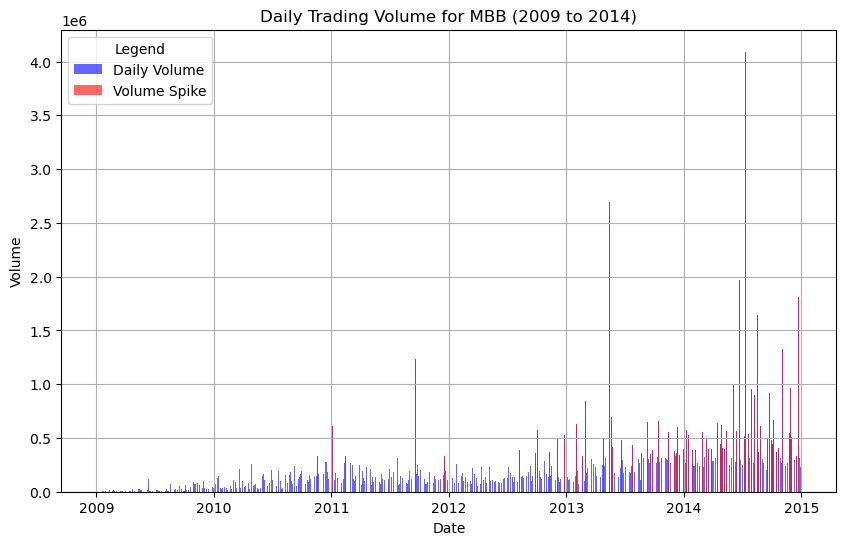

In [39]:
pd.options.mode.copy_on_write = True
files = concaterd['File'].tolist()
file_ = random.choice(files)
print(file_)
price_volume_analysis(concaterd,file_,2009,2014)

### Profit and Loss Report

In [46]:
def profit_loss(df,file_name,start_year,end_year):
    file_df = df[(df['File']==file_name)&(df['Date'].dt.year >= start_year)&(df['Date'].dt.year <= end_year)]
    
    if len(file_df)>0:
        start_open = file_df.iloc[0]['Open']
        end_close = file_df.iloc[-1]['Close']
        profit_loss = end_close - start_open
        
        if profit_loss > 0:
            result = 'profit'
        elif profit_loss<0:
            result = 'loss'
        print(f'\n ETF {file_name.upper()} from  {start_year} to {end_year}: ')
        print(f' - Start Open Price: {start_open}')
        print(f' - End Close Price: {end_close}')
        print(f' - Overall {result}: {profit_loss:.2f}')
        
        plt.figure(figsize=(8,6))
        plt.plot(file_df['Date'],file_df['Open'],marker = 'o',markersize=8, linestyle='-',label='Open Price')
        plt.plot(file_df['Date'],file_df['Close'],marker = '^',markersize=2, linestyle='-',label='Close Price')
        plt.axhline(start_open,color='blue',linestyle='--',linewidth=0.7, label='Start Open Price')
        plt.axhline(end_close,color='red',linestyle='--',linewidth=0.4, label='End Close Price')
        plt.title(f'Open and Close Prices for {file_name.upper()} ({start_year} to {end_year})')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend(title='Legend')
        plt.grid(True)
        plt.show()
    else:
        print('NO availble Data for given parameters')
        


 ETF DIA from  2009 to 2011: 
 - Start Open Price: 89.76
 - End Close Price: 106.32
 - Overall profit: 16.56


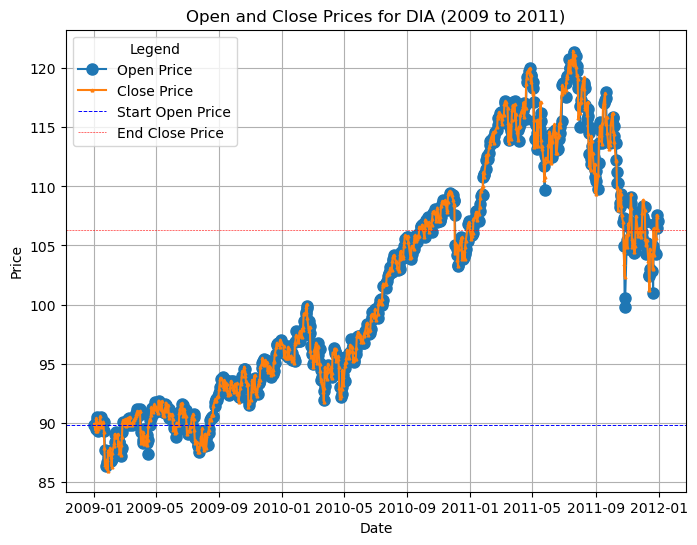

In [47]:
files = concaterd['File'].tolist()
file_ = random.choice(files)
#file_
profit_loss(concaterd,file_,2009,2011)